In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


### Load data

In [2]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Work with data

In [3]:
data.shape

(10000, 14)

In [4]:
# check data describe -> there are no null values
## And our target(Exited) is binary([0, 1])
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
print('RowNumber qt unique value: ', data['RowNumber'].nunique())
print('CustomerId qt unique value: ', data['CustomerId'].nunique())

RowNumber qt unique value:  10000
CustomerId qt unique value:  10000


In [6]:
# Let's see Dtype of our features
## Surname, Geography, Gender should be categorical
### Surname has no benefit for our future predictions. Same as RowNumber and CustomerId
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Check unique number of categorical features
## Gender is a binary categorical feature
print('Geography qt unique value: ', data['Geography'].nunique())
print('Geography unique value: ', data['Geography'].unique())
print('-'*30)
print('Gender qt unique value: ', data['Gender'].nunique())
print('Gender unique value: ', data['Gender'].unique())

Geography qt unique value:  3
Geography unique value:  ['France' 'Spain' 'Germany']
------------------------------
Gender qt unique value:  2
Gender unique value:  ['Female' 'Male']


(array([7963.,    0.,    0.,    0., 2037.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

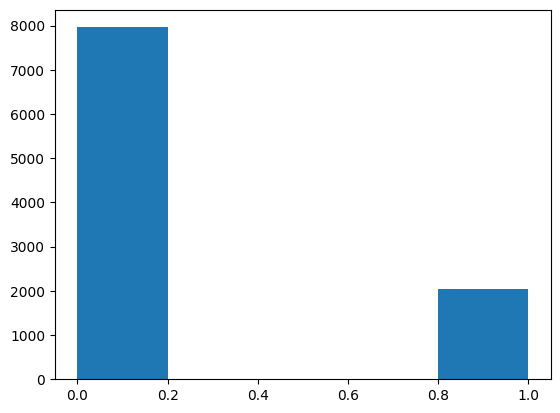

In [8]:
# Check for balance of our target
## Maybe we should balance our data in future
plt.hist(data['Exited'], bins=5)

In [9]:
# Create new dataframe to work with
data_dr = data.copy()

In [10]:
# Now encoding two other categorical features Gender -> [0, 1], Geography -> [0, 1, 2]
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
data_dr['Geography'] = lc.fit_transform(data_dr['Geography'])
data_dr['Gender'] = lc.fit_transform(data_dr['Gender'])

In [11]:
# Drop features [Surname, RowNumber, CustomerId] as we won't use them for predict
data_dr = data_dr.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [12]:
data_dr

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


### Split Data to train and test sets

In [13]:
# split our data to test and train sets
from sklearn.model_selection import train_test_split

X = data_dr.drop(['Exited'], axis=1)
y = data_dr['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Prediction

#### LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

lr_acc = accuracy_score(y_test, y_pred_lr)
print('LogisitcRegression accuracy = {:.2f}'.format(lr_acc))

LogisitcRegression accuracy = 0.80


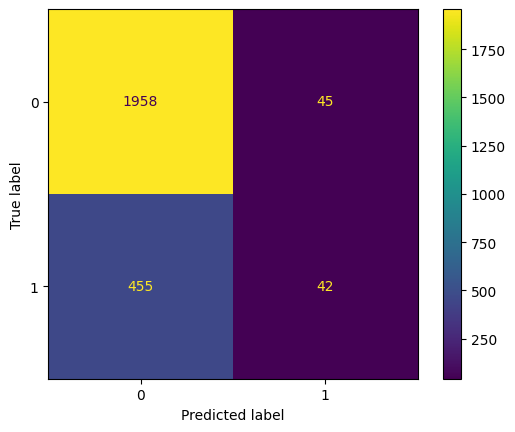

In [16]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(cm, display_labels=lr.classes_)
disp.plot()

#### CatBoost

In [17]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(iterations=300, random_state=42, verbose=100)
cbc.fit(X_train, y_train)

y_pred_cbc = cbc.predict(X_test)

Learning rate set to 0.073462
0:	learn: 0.6351271	total: 56.1ms	remaining: 16.8s
100:	learn: 0.3010616	total: 432ms	remaining: 851ms
200:	learn: 0.2681980	total: 797ms	remaining: 392ms
299:	learn: 0.2432307	total: 1.15s	remaining: 0us


In [18]:
cbc_acc = accuracy_score(y_test, y_pred_cbc)
print('CatBoostClassifier = {:2f}'.format(cbc_acc))

CatBoostClassifier = 0.870000


#### CatBoost with built-in categorical features encoder

In [19]:
df = data.copy()
df = df.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)
cat_features = ['Gender', 'Geography']

In [20]:
X_1 = df.drop(['Exited'], axis=1)
y_1 = df['Exited']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

In [21]:
cat_cbc = CatBoostClassifier(iterations=900, random_state=42, cat_features=cat_features, verbose=100)
cat_cbc.fit(X_train_1, y_train_1)

y_pred_cat_cbc = cat_cbc.predict(X_test_1)

Learning rate set to 0.026825
0:	learn: 0.6743527	total: 9.87ms	remaining: 8.87s
100:	learn: 0.3336394	total: 752ms	remaining: 5.95s
200:	learn: 0.3152874	total: 1.47s	remaining: 5.11s
300:	learn: 0.3034394	total: 2.17s	remaining: 4.33s
400:	learn: 0.2913417	total: 2.92s	remaining: 3.63s
500:	learn: 0.2795710	total: 3.72s	remaining: 2.96s
600:	learn: 0.2689392	total: 4.47s	remaining: 2.22s
700:	learn: 0.2593060	total: 5.22s	remaining: 1.48s
800:	learn: 0.2505765	total: 5.99s	remaining: 740ms
899:	learn: 0.2426020	total: 6.71s	remaining: 0us


In [22]:
cat_cbc_acc = accuracy_score(y_test, y_pred_cat_cbc)
print('CatBoostClassifier = {:2f}'.format(cat_cbc_acc))

CatBoostClassifier = 0.872400


#### GridSearch for CatBoost model

In [23]:
# tune_cbc = CatBoostClassifier(iterations=900, random_state=42, verbose=False)
# param_grid = {
#     'learning_rate': [0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 4, 5],
#     'n_estimators': [100, 150],
#     'l2_leaf_reg': [1, 3, 5]
# }

# grid_search = tune_cbc.grid_search(param_grid=param_grid, X=X_train, y=y_train, verbose=100)

In [24]:
# grid_search['params']

In [25]:
cat_b = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.2, l2_leaf_reg=5, random_state=42, verbose=100)
cat_b.fit(X_train, y_train)

y_cat_b_pred = cat_b.predict(X_test)

cat_b_acc = accuracy_score(y_test, y_cat_b_pred)
print('CatBoostClassifier = {:2f}'.format(cat_b_acc))

0:	learn: 0.6026758	total: 2.29ms	remaining: 227ms
99:	learn: 0.3102987	total: 166ms	remaining: 0us
CatBoostClassifier = 0.872800


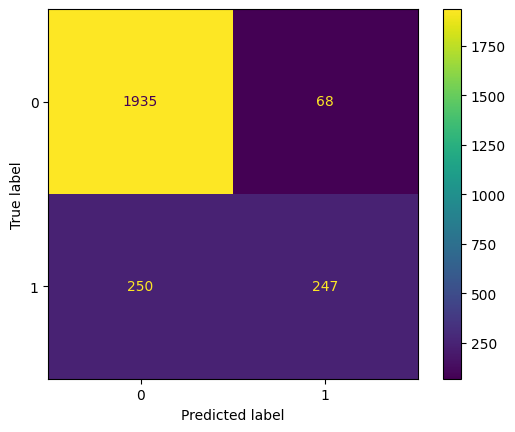

In [26]:
# Let's see our confusion matrix
## Looks like it better predict our class ['1']
cm = confusion_matrix(y_test, y_cat_b_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=cat_b.classes_)
disp.plot()